In [87]:
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv("../../dataset/swat-attack.csv", delimiter=";", decimal=",")

In [89]:
df.columns = [column.strip() for column in df.columns]
df["Normal/Attack"] = df["Normal/Attack"].replace(["A ttack"], "Attack")

In [90]:
df.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [91]:
print (len(df))

449919


In [92]:
df["Timestamp"][400000]

' 2/1/2016 1:08:01 AM'

In [93]:
df.loc[df["Timestamp"] == " 28/12/2015 11:22:00 AM"]

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
4920,28/12/2015 11:22:00 AM,2.579188,592.0323,2,1,1,263.3299,8.446424,316.5342,0.0,...,2,1,250.0,1.617916,188.8939,0.000256,1,1,1,Attack


In [94]:
df.loc[df["Timestamp"] == " 28/12/2015 11:28:22 AM"]

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
5302,28/12/2015 11:28:22 AM,0.0,749.5707,1,1,1,263.4581,8.45059,318.8157,0.0,...,2,1,248.9586,1.681991,187.8845,0.000128,1,1,1,Attack


In [95]:
df["LIT101Attack"] = "Normal"

In [96]:
start_attack = df.loc[df["Timestamp"] == " 28/12/2015 11:22:00 AM"].index[0].astype(int)
end_attack =df.loc[df["Timestamp"] == " 28/12/2015 11:28:22 AM"].index[0].astype(int)

print(start_attack, end_attack)
df.loc[start_attack:end_attack+1, "LIT101Attack"] = "Attack"

4920 5302


In [97]:
start_attack = df.loc[df["Timestamp"] == " 29/12/2015 6:30:00 PM"].index[0].astype(int)
end_attack =df.loc[df["Timestamp"] == " 29/12/2015 6:42:00 PM"].index[0].astype(int)

print(start_attack, end_attack)
df.loc[start_attack:end_attack+1, "LIT101Attack"] = "Attack"

117000 117720


In [98]:
start_attack = df.loc[df["Timestamp"] == " 31/12/2015 3:47:00 PM"].index[0].astype(int)
end_attack =df.loc[df["Timestamp"] == " 31/12/2015 4:07:00 PM"].index[0].astype(int)

print(start_attack, end_attack)
df.loc[start_attack:end_attack+1, "LIT101Attack"] = "Attack"

280020 281220


In [99]:
start_attack = df.loc[df["Timestamp"] == " 1/1/2016 2:21:12 PM"].index[0].astype(int)
end_attack =df.loc[df["Timestamp"] == " 1/1/2016 2:28:35 PM"].index[0].astype(int)

print(start_attack, end_attack)
df.loc[start_attack:end_attack+1, "LIT101Attack"] = "Attack"

361191 361634


In [100]:
start_attack = df.loc[df["Timestamp"] == " 1/1/2016 10:16:01 PM"].index[0].astype(int)
end_attack =df.loc[df["Timestamp"] == " 1/1/2016 10:25:00 PM"].index[0].astype(int)

print(start_attack, end_attack)
df.loc[start_attack:end_attack+1, "LIT101Attack"] = "Attack"

389680 390219


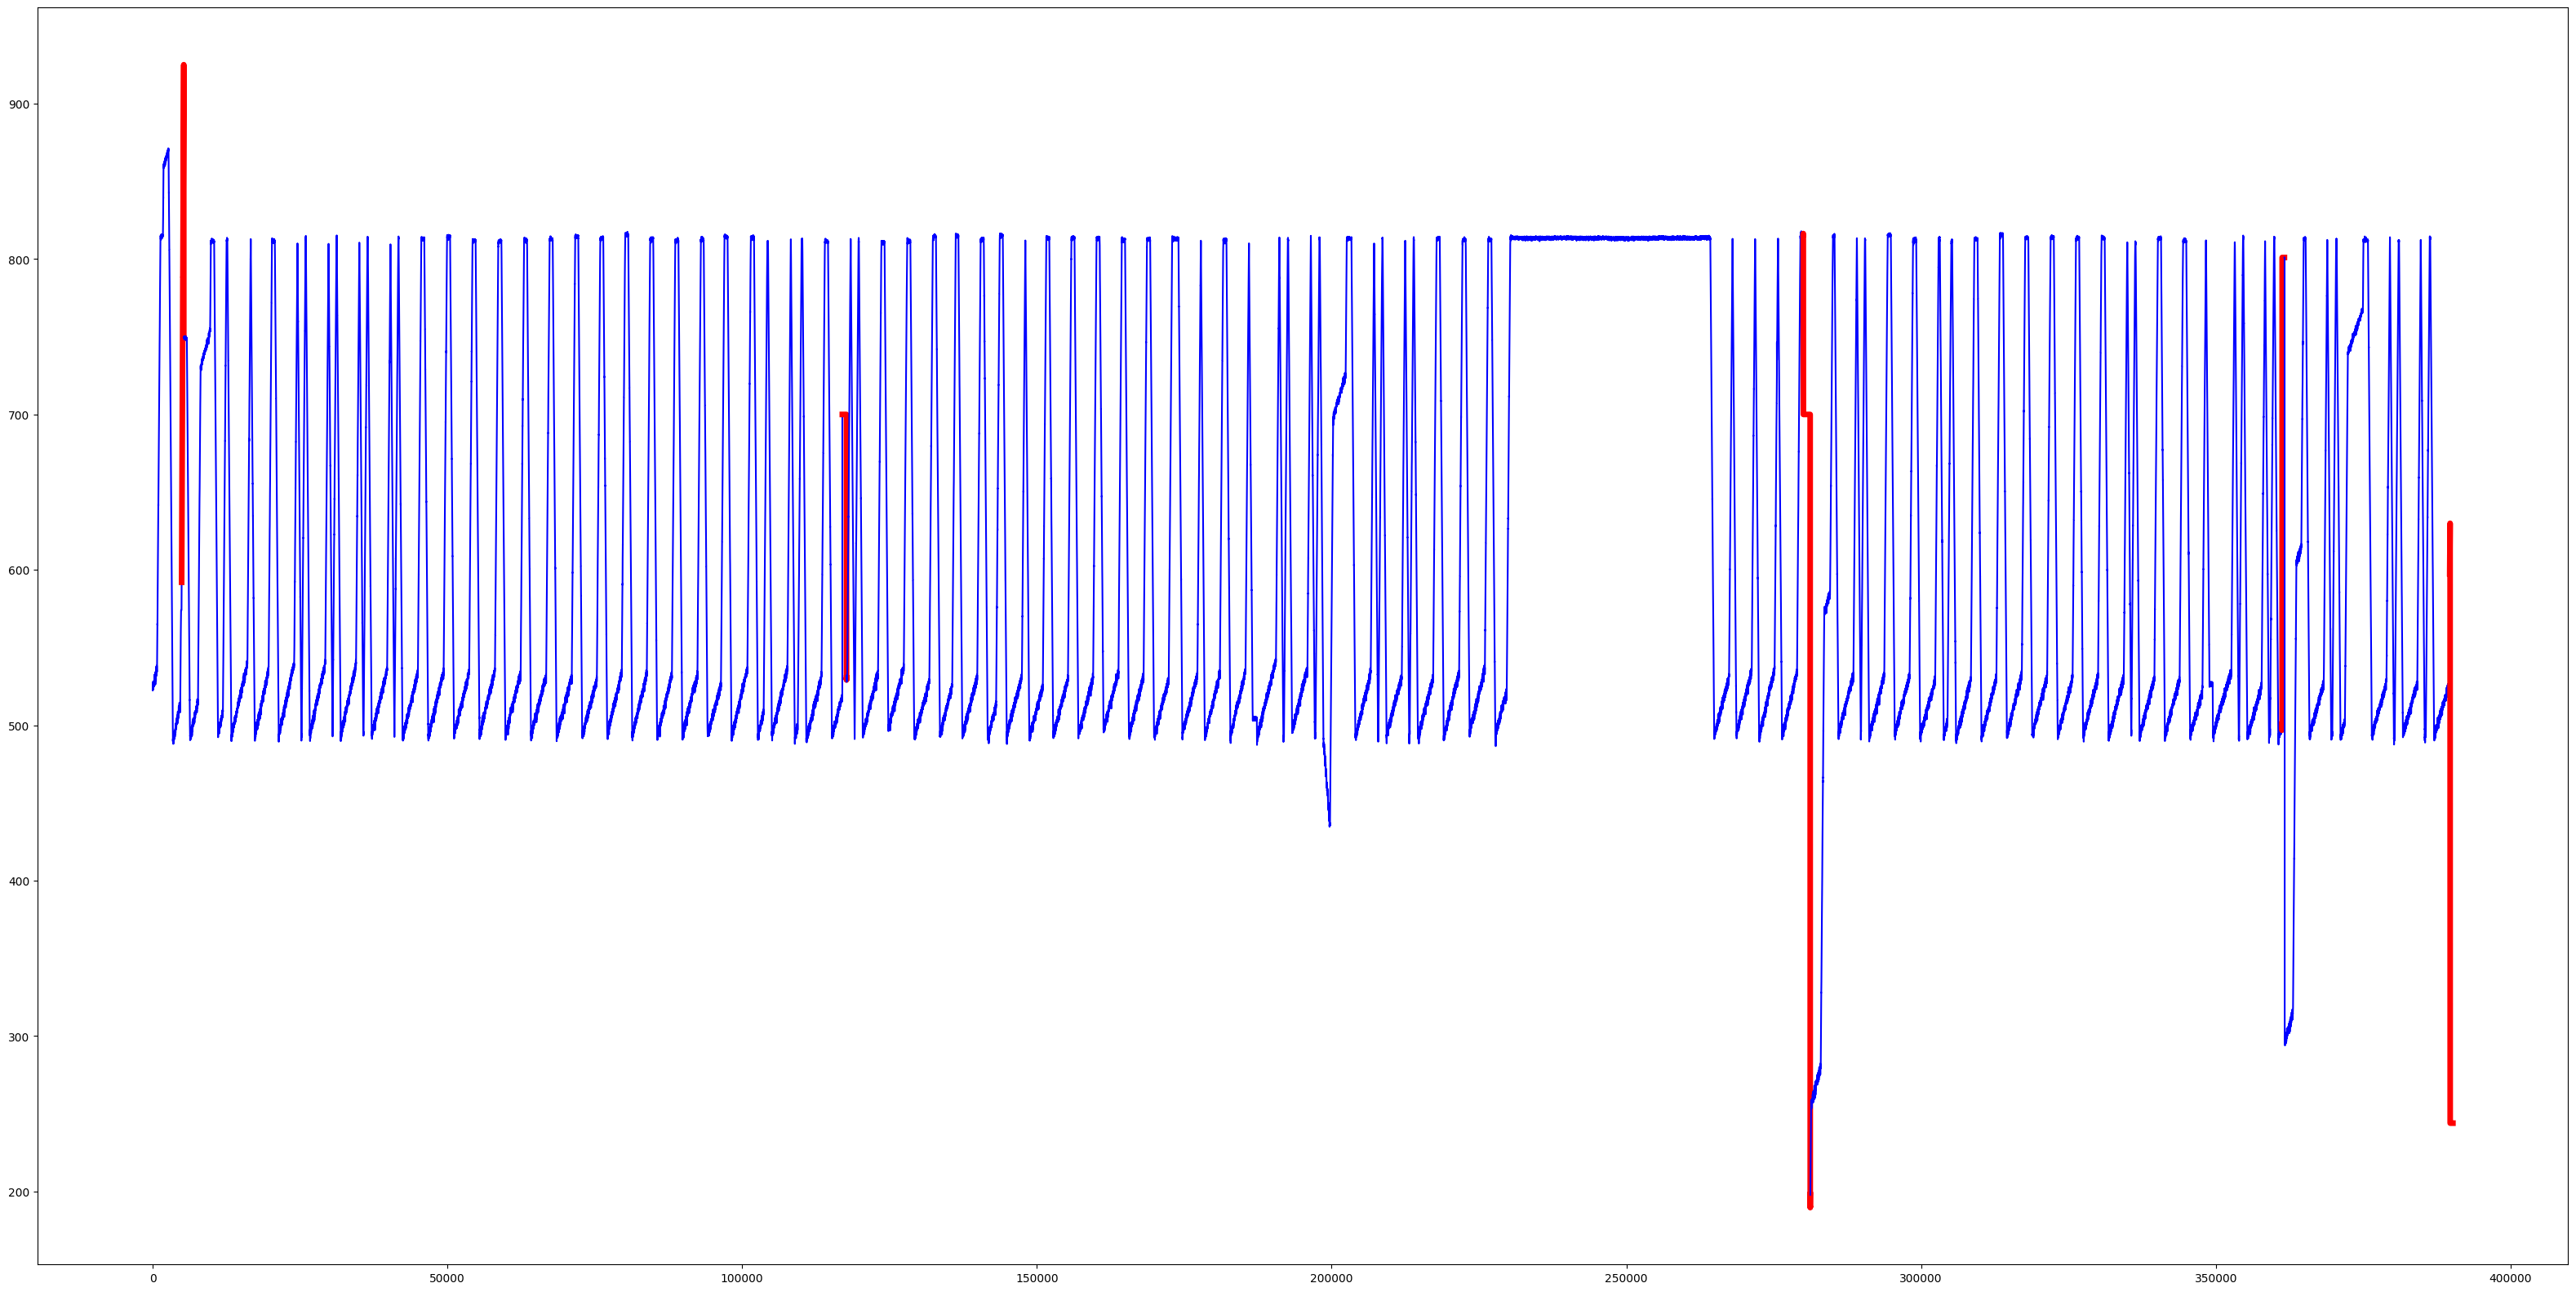

In [102]:
# df['LIT301'].plot()
start = 0
end = 0
is_attack = False
plt.figure(figsize=(40,20))
for i in range(len(df)):
    if not is_attack and df["LIT101Attack"][i] == "Attack":
        end = i
        plt.plot(df.loc[start:end, "LIT101"], color="blue")
        is_attack = True
        start = i

    if is_attack and df["LIT101Attack"][i] == "Normal":
        end = i
        plt.plot(df.loc[start:end, "LIT101"], color="red", linewidth=5)
        is_attack = False
        start = i
        
plt.show()
# plt.show()